In [161]:
import numpy

from matplotlib import pyplot

In [162]:
def shuffle_markov(n: int) -> numpy.ndarray:
    """Returns the Markov transition matrix for a single `n` card riffle shuffle."""
    if n % 2 != 0:
        raise ValueError(f'n must be even; got {n}')
    half_n = n // 2
    out = numpy.zeros((n, n))
    for i in range(half_n):
        out[2 * i, i] = 0.5
        out[2 * i + 1, i] = 0.5
    for j in range(half_n, n):
        out[2 * (j - half_n), j] = 0.5
        out[2 * (j - half_n) + 1, j] = 0.5
    return out

In [163]:
num_cards = 52
num_shuffles = 7

Text(0.5, 0, 'Initial card position')

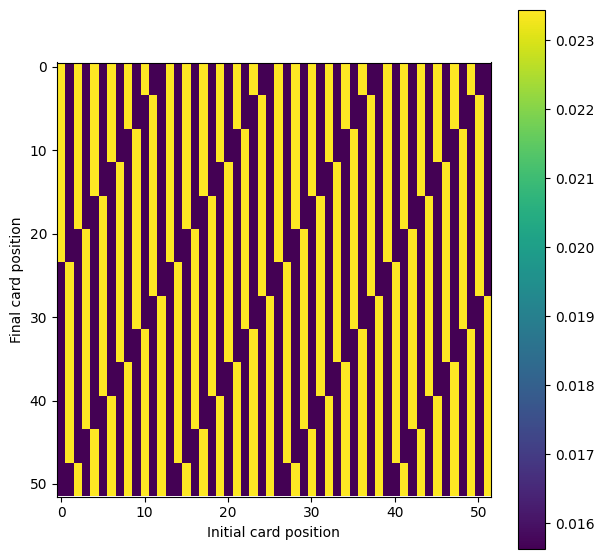

In [164]:
orig = shuffle_markov(num_cards)
mat = numpy.eye(num_cards)
for i in range(num_shuffles):
    mat = orig.dot(mat)
fig = pyplot.figure(figsize=(7,7))
ax = fig.gca()
heatmap = ax.imshow(mat)
cbar = fig.colorbar(heatmap, ax=ax)
ax.set_ylabel('Final card position')
ax.set_xlabel('Initial card position')

Text(0, 0.5, 'Shuffle count')

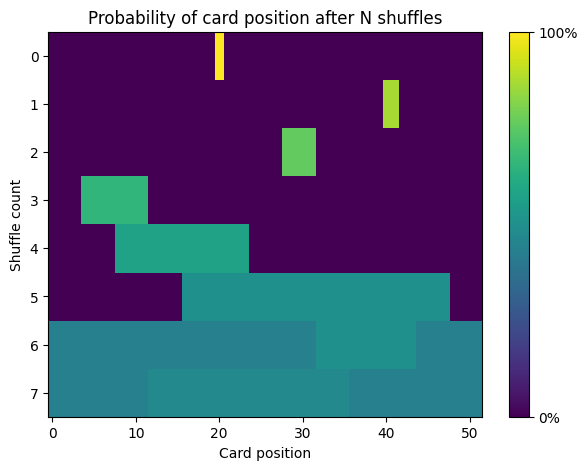

In [170]:
initial_position = 20
gamma = 0.2
pos = numpy.array([1 if i == initial_position else 0 for i in range(num_cards)]).reshape((num_cards, 1))
mat = shuffle_markov(num_cards)
out = numpy.zeros((num_shuffles + 1, num_cards))
out[0, :] = pos.T
for i in range(num_shuffles):
    pos = mat.dot(pos)
    out[i + 1, :] = pos.T
fig = pyplot.figure(figsize=(7,5))
ax = fig.gca()
heatmap = ax.imshow(numpy.power(out, gamma), aspect='auto')
cbar = fig.colorbar(heatmap, ax=ax)
cbar.set_ticks([1.0, 0.0], labels=['100%', '0%'])
ax.set_title('Probability of card position after N shuffles')
ax.set_xlabel('Card position')
#ax.set_xticks(range(num_cards))
ax.set_yticks(range(num_shuffles + 1))
ax.set_ylabel('Shuffle count')